In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append("../scripts")
from smi_processing import standardise_smiles

datapath = "../data"

0
41 214 0.19158878504672897


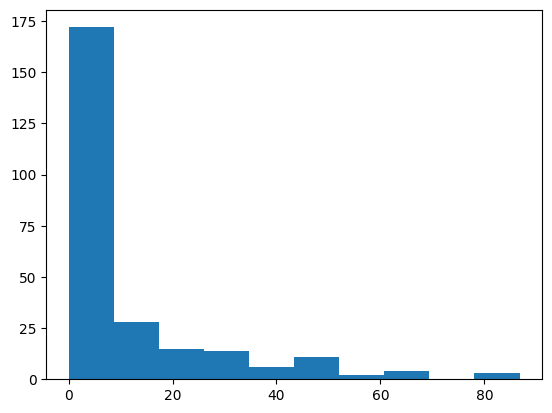

In [21]:
df = pd.read_csv(os.path.join(datapath, "raw", "sarathy2016.csv"))
df["st_smiles"] = standardise_smiles(df["smiles"].tolist())
print(len(df[df["st_smiles"].isna()]))
df = df[["st_smiles", "fu"]]
df["fu"] = pd.to_numeric(df["fu"], errors="coerce")
plt.hist(df["fu"])

cutoff = 25
nactives = len(df[df["fu"]>=cutoff])
ninactives = len(df[df["fu"]<cutoff])
print(nactives, ninactives, nactives/ninactives)

df["bin"]=[1 if x>=cutoff else 0 for x in df["fu"].tolist()]
df[["st_smiles", "bin"]].to_csv(os.path.join(datapath, "processed", "sarathy2016.csv"), index=False)

In [ ]:
df = pd.read_csv(os.path.join(datapath, "raw", "janardhan2016.csv"))
print("total compounds: ", len(df))
print("high: ",len(df[df["pMIC"]>=7]))
print("moderate: ",len(df[(df["pMIC"] > 5) & (df["pMIC"] < 7)]))
print("low: ",len(df[df["pMIC"]<=5]))

#real negatives: Low activity (pMIC <= 5, because they come from the high enzymatic actives IC50>6)
#discard in between compounds

df = df[(df["pMIC"]<=5) | (df["pMIC"]>= 7)]
print(len(df))
df["st_smiles"]=standardise_smiles(df["smiles"].tolist())
df = df[~df["st_smiles"].isna()]
print(len(df))

cutoff = 7
nactives = len(df[df["pMIC"]>=cutoff])
ninactives = len(df[df["pMIC"]<cutoff])
print(nactives, ninactives, nactives/ninactives)

df["bin"]=[1 if x>=cutoff else 0 for x in df["pMIC"].tolist()]
df[["st_smiles", "bin"]].to_csv(os.path.join(datapath, "processed", "janardhan2016.csv"), index=False)

total compounds:  357
high:  278
moderate:  24
low:  55
333


[17:04:01] SMILES Parse Error: unclosed ring for input: 'COC1CCC(CC1)\N=C\2/C=C3N(c4ccc(Cl)cc4)c5ccccc5N=C3C=C2Nccccnc6C'
[17:04:01] SMILES Parse Error: extra close parentheses while parsing: [O-][N+](=O)c1cn2C[C@@H](COc2n1)OCCCC#Cc3ccc(cc3)c4ccc(OC(F)F)F)cc4
[17:04:01] SMILES Parse Error: check for mistakes around position 64:
[17:04:01] c(cc3)c4ccc(OC(F)F)F)cc4
[17:04:01] ~~~~~~~~~~~~~~~~~~~~^
[17:04:01] SMILES Parse Error: Failed parsing SMILES '[O-][N+](=O)c1cn2C[C@@H](COc2n1)OCCCC#Cc3ccc(cc3)c4ccc(OC(F)F)F)cc4' for input: '[O-][N+](=O)c1cn2C[C@@H](COc2n1)OCCCC#Cc3ccc(cc3)c4ccc(OC(F)F)F)cc4'
[17:04:01] Can't kekulize mol.  Unkekulized atoms: 26 27 28 29 30


330
275 55 5.0


In [31]:
df = pd.read_csv(os.path.join(datapath, "raw", "radchenko2023.csv"))
print(len(df))
df["st_smiles"]=standardise_smiles(df["Smiles"].tolist())
df = df[~df["st_smiles"].isna()]
print(len(df))
nactives = len(df[df["MtbPen"]==1])
ninactives = len(df[df["MtbPen"]==0])
print(nactives, ninactives, nactives/ninactives)

df.rename(columns={"MtbPen": "bin"}, inplace=True)
df[["st_smiles", "bin"]].to_csv(os.path.join(datapath, "processed", "radchenko2023.csv"), index=False)

5371


[17:10:09] Can't kekulize mol.  Unkekulized atoms: 3 8
[17:10:11] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 6 10
[17:10:12] Can't kekulize mol.  Unkekulized atoms: 3 10
[17:10:12] Can't kekulize mol.  Unkekulized atoms: 3 10
[17:10:12] Can't kekulize mol.  Unkekulized atoms: 3 10
[17:10:15] Can't kekulize mol.  Unkekulized atoms: 3 15
[17:10:15] Can't kekulize mol.  Unkekulized atoms: 3 15
[17:10:15] Can't kekulize mol.  Unkekulized atoms: 3 8


5371
2671 2700 0.9892592592592593


dict_keys(['1200', '380', '40'])
1564
1564
702 862 0.814385150812065
688 876 0.7853881278538812


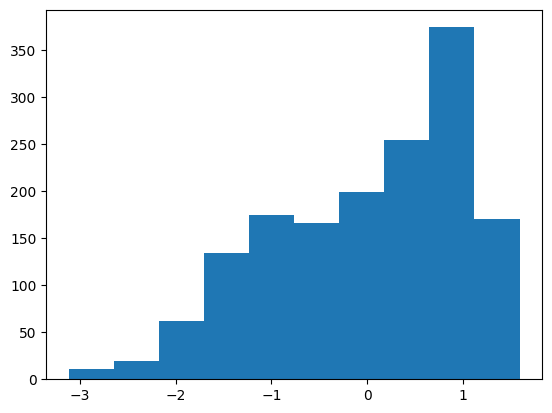

In [ ]:
df = pd.read_excel(os.path.join(datapath, "raw", "lepori2025.xlsx"), sheet_name=None)
print(df.keys())
dfs = []
for k,v in df.items():
    dfs += [v]
df = pd.concat(dfs)
print(len(df))
df["st_smiles"]=standardise_smiles(df["smiles"].tolist())
df = df[~df["st_smiles"].isna()]
print(len(df))
plt.hist(df["mtb_resid_std"])
cutoff = 0
nactives = len(df[df["mtb_resid_std"]<=cutoff])
ninactives = len(df[df["mtb_resid_std"]>cutoff])
print(nactives, ninactives, nactives/ninactives)
nactives = len(df[df["msm_resid_std"]<=cutoff])
ninactives = len(df[df["msm_resid_std"]>cutoff])
print(nactives, ninactives, nactives/ninactives)

df_mtb = df.copy()
df_mtb["bin"]  = [1 if x<=cutoff else 0 for x in df_mtb["mtb_resid_std"].tolist()]
df_mtb[["st_smiles", "bin"]].to_csv(os.path.join(datapath, "processed", "lepori2025_mtb.csv"), index=False)

df_msm = df.copy()
df_msm["bin"]  = [1 if x<=cutoff else 0 for x in df_msm["mtb_resid_std"].tolist()]
df_msm[["st_smiles", "bin"]].to_csv(os.path.join(datapath, "processed", "lepori2025_msm.csv"), index=False)